# Project Description

## Inspiration
In this project, I am working as an analyst for Zuber, a new ride-sharing company launching in Chicago. This project marks my first experience with SQL, a fundamental tool for managing and analyzing large datasets; parsing data from a website. Developing proficiency in SQL will be valuable in my pursuit of digital marketing and finance, where data driven decision making plays a critical role. In addition to SQL, I will leverage Python to visualize trends, analyze drop-off locations, and conduct statistical hypothesis testing. This project provides an opportunity to deepen my expertise in data analysis while furthering my hands-on experience with databases and advanced analytical techniques.

## Goal 
Find patterns in the available information, understanding passenger preferences and the impact of external factors on rides.

### Step 1: Parse Data (SQL)
* Write a code to parse data on weather in Chicago in November 2017 from this website: https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

### Step 2: Exploratory Data Analysis (SQL)
* Find the number of taxi rides for each taxi company for November 15-16, 2017.
* Find the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017.
* Find the number of rides for the two most popular taxi companies.

### Step 3: Test Hypothesis - The Duration of Rides From Loop to O'Hare International Airport Changes on Rainy Saturdays (SQL)
* Retrieve the identifiers of the O'Hare and Loop neighborhoods from the neighborhoods table.
* For each hour, retrieve the weather condition records from the weather_records table.
* Retrieve from the trips table all the rides that started in Loop and ended at O'Hare on a Saturday. Get the weather conditions for each ride while ignoring rides for which weather condition is not available.

### Step 4: Prepare Data (Python)
* Clean the results of my SQL datasets by handling duplicates, missing values, and correcting data types.

### Step 5: Exploratory Data Analysis (Python)
* Identify the top 10 neighborhoods in terms of drop-offs.
* Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs.
* Draw conclusions based on each graph and explain results.

### Step 6: Testing Hypotheses (Python)
* "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." Explaining how I formed the null and alternative hypotheses; what criterion I used to test the hypotheses and why.

### Step 7: Write a General Conclusion

# Importing Libraries and SQL Results

In [25]:
import pandas as pd

In [26]:
import numpy as np

In [27]:
import scipy as st

In [28]:
import statistics

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

In [31]:
import re

In [32]:
company_data = pd.read_csv('moved_project_sql_result_01.csv')

In [33]:
dropoff_data = pd.read_csv('moved_project_sql_result_04.csv')

In [34]:
loop_ohare_airport = pd.read_csv('moved_project_sql_result_07.csv')

Creating function to look over data

In [36]:
def analyze(df):
    display(df.head())
    print(' ')
    print(df.info())
    print('---------------------------')
    print(' ')
    print('Potential Duplicates')
    print(' ')
    print(df.duplicated().sum())
    print('---------------------------')
    print(' ')
    print('Potential Missing Values')
    print(' ')
    print(df.isna().sum())

# Preparing Data

In [38]:
analyze(company_data)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
---------------------------
 
Potential Duplicates
 
0
---------------------------
 
Potential Missing Values
 
company_name    0
trips_amount    0
dtype: int64


In [39]:
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


## Dataset Observations
This dataset has 2 columns with 64 entries, there are no duplicates or missing values and the data types are correct. The dataset does have number groups with a hyphen between them.

Dataset Corrections 
- Using Re, the number groups and hyphens will be removed so the name is whats left.

In [41]:
company_data['company_name'] = company_data['company_name'].apply(lambda x: re.sub(r'\d+\s*-\s*\d+|\b\d{3,}\b|-', '', x))

In [42]:
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,Adwar H. Nikola,7
60,Benny Jona,7
61,Sergey Cab Corp.,5
62,"Felman Corp, Manuel Alonso",3


In [43]:
analyze(dropoff_data)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
---------------------------
 
Potential Duplicates
 
0
---------------------------
 
Potential Missing Values
 
dropoff_location_name    0
average_trips            0
dtype: int64


## Dataset Observations
This dataset has 2 columns with 94 entries, there are no duplicates or missing values and the data types are correct. The dataset is clean.

In [45]:
analyze(loop_ohare_airport)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
---------------------------
 
Potential Duplicates
 
197
---------------------------
 
Potential Missing Values
 
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


## Dataset Observations
loop_ohare_airport dataset has 3 columns with 1,068 entries, there are no missing values but 197 duplicates. The start_ts column has an incorrect datatype of object which should be datetime. duration_seconds may not need to be float data type.

Dataset Corrections 
* Remove duplicates 
* Change start_ts column data type to datetime
* If duration_seconds column doesn't need to be float, will be changed to int data type

In [47]:
loop_ohare_airport = loop_ohare_airport.drop_duplicates() # dropping duplicates

In [48]:
loop_ohare_airport['start_ts'] = pd.to_datetime(loop_ohare_airport['start_ts'], errors = 'coerce') # Changing column to datetime data type

In [49]:
(loop_ohare_airport['duration_seconds'] % 1 != 0).sum() # Checking to see if column has any decimal value besides 0

0

In [50]:
loop_ohare_airport['duration_seconds'] = loop_ohare_airport['duration_seconds'].astype(int) # Changing column to int data type

In [51]:
analyze(loop_ohare_airport) # Verifying changes

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


 
<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 23.8+ KB
None
---------------------------
 
Potential Duplicates
 
0
---------------------------
 
Potential Missing Values
 
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


# EDA

Identifying top 10 neighborhoods in terms of dropoff.

In [54]:
top_10_neighborhoods = dropoff_data.head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Bar chart showing taxi companies with number of rides.

C:\Users\mikey\AppData\Local\Temp\ipykernel_100156\3636726564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = company_data, y = 'company_name', x = 'trips_amount', palette = 'viridis')


Text(0.5, 0, 'Trips Amount')

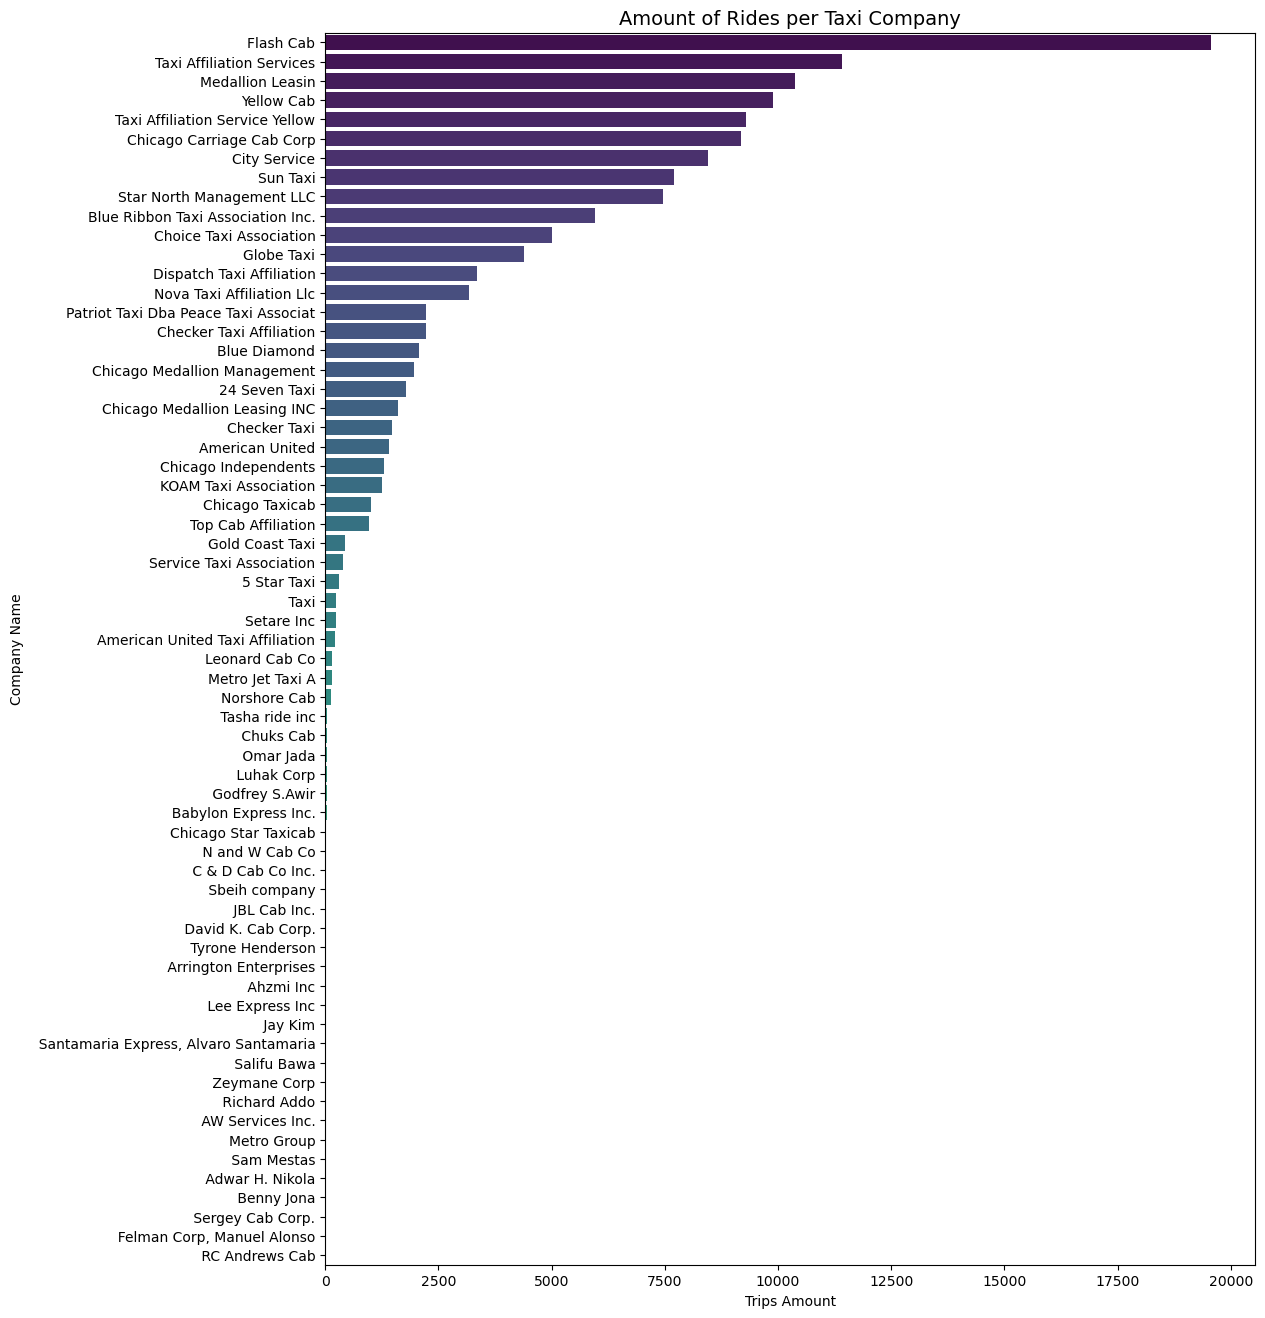

In [56]:
plt.figure(figsize = (12,16))
sns.barplot(data = company_data, y = 'company_name', x = 'trips_amount', palette = 'viridis')
plt.title('Amount of Rides per Taxi Company', fontsize = 14)
plt.ylabel('Company Name')
plt.xlabel('Trips Amount')

Top 10 taxi company rides to avoid clutter of insignificant companies.

C:\Users\mikey\AppData\Local\Temp\ipykernel_100156\2613675974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = company_data.head(10), y = 'company_name', x = 'trips_amount', palette = 'viridis')


Text(0.5, 0, 'Trips Amount')

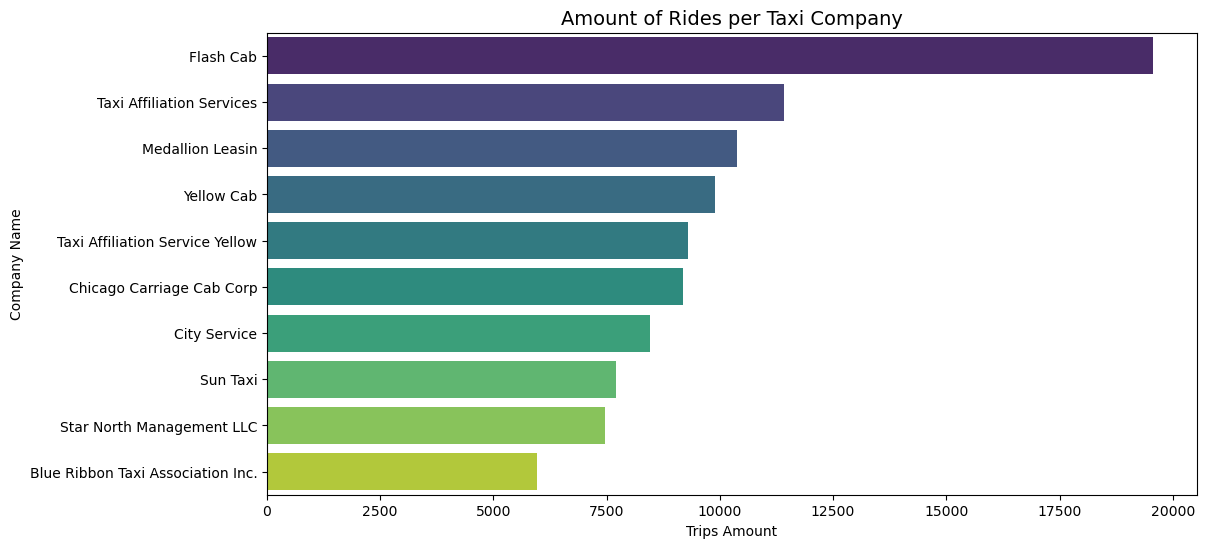

In [58]:
plt.figure(figsize = (12,6))
sns.barplot(data = company_data.head(10), y = 'company_name', x = 'trips_amount', palette = 'viridis')
plt.title('Amount of Rides per Taxi Company', fontsize = 14)
plt.ylabel('Company Name')
plt.xlabel('Trips Amount')

Pie chart for top 10 neighborhoods.

Text(0.5, 1.0, 'Distribution of Top 10 neighborhoods')

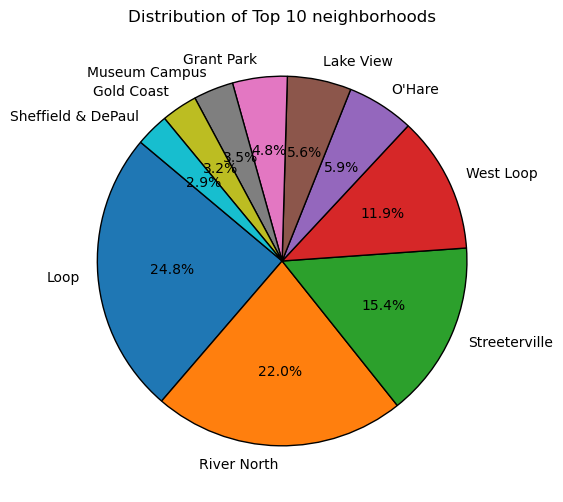

In [60]:
plt.figure(figsize = (10,6))
plt.pie(top_10_neighborhoods['average_trips'], labels = top_10_neighborhoods['dropoff_location_name'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Top 10 neighborhoods')

EDA Conclusions: 
Riders prefer to use Flash Cab and mostly get droped off at Loop and River North.

Taxi Company Popularity: 
* Flash Cab dominates the ride-sharing market with nearly 20,000 trips, significantly outperforming competitors. The next closest company, Taxi Affiliation Services, has nearly half as many trips, suggesting that Flash Cab holds a strong competitive advantage. The remaining companies contribute comparatively fewer trips, reinforcing the concentration of market share among a few key players.

Drop-off Location Trends:

* Loop (24.8%) emerges as the most frequent destination, indicating it is a key hub for riders.
* River North (22%) follows closely.
* Streeterville (15.4%) and West Loop (11.9%) are also notable, but all other neighborhoods make up a much smaller share of trips.

# Testing Hypothesis

Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Null Hypothesis: The average duration of rides does not change on rainy Saturdays.

Alternate Hypothesis: The average duration of rides does change on rainy Saturdays.

Seperating data into 2 groups of rainy Saturdays and non rainy Saturdays

In [65]:
loop_ohare_airport

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700
1061,2017-11-18 16:00:00,Bad,2186
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318


In [66]:
loop_ohare_airport['start_ts'].dt.day_name().unique() # All the dates are Saturdays

array(['Saturday'], dtype=object)

In [67]:
rainy_saturdays = loop_ohare_airport[loop_ohare_airport['weather_conditions'] == 'Bad'] # Creating rainy Saturday group

In [68]:
non_rainy_saturdays = loop_ohare_airport[loop_ohare_airport['weather_conditions'] == 'Good'] # Creating non rainy Saturday group

In [69]:
test = st.stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var = False)

alpha = 0.01

print(f'test p-value: {test.pvalue}')

if test.pvalue < alpha:
    print('Null hypothesis rejected, the average ride duration on Saturday does change due to rainy weather')
else:
    print('Null hypothesis accepted, the average ride duration on Saturday does not change due to rainy weather')

test p-value: 9.126383933880083e-08
Null hypothesis rejected, the average ride duration on Saturday does change due to rainy weather


Alpha: 0.01 was chosen, meaning there's only a 1% chance of rejecting the null hypothesis when it’s true. This is appropriate given the high accuracy of the data

Hypothesis: A two-sample t-test was performed with unequal variances to compare ride durations on rainy Saturdays vs. non-rainy Saturdays. The p-value of the test tells you whether the difference between the groups is statistically significant.

Why: The null hypothesis assumes no change in ride duration, and the alternative hypothesis assumed a change.
The low p-value provides strong evidence to reject the null, concluding that rainy Saturdays do impact ride duration.
The choice of alpha being 0.01 reflects the desire for strong confidence in the results.

# General Conclusion
This analysis reveals several key insights into the ride-sharing market, particularly focusing on the popularity of taxi companies and the most common drop-off locations.

* Taxi Company Popularity: Flash Cab is the dominant player in the market, with nearly 20,000 trips, substantially outpacing its competitors. The second-place company, Taxi Affiliation Services, has significantly fewer trips, showing a clear market leader. The other taxi companies contribute a minor portion of total rides, emphasizing Flash Cab's strong competitive advantage.

* Drop-off Location Trends: The Loop (24.8%) stands out as the primary destination for riders, followed by River North (22%). Other neighborhoods like Streeterville (15.4%) and West Loop (11.9%) also account for a notable share of trips. The remaining neighborhoods have much smaller shares, underscoring the centrality of these few locations in the ride-sharing pattern.

* Rainy Saturdays Hypothesis Test: A t-test was conducted to determine whether rainy Saturdays have a significant effect on ride durations. The null hypothesis, stating that ride durations do not change on rainy Saturdays, was rejected based on a p-value of 9.13e-08. This strongly suggests that the average ride duration does change on rainy Saturdays, confirming that weather conditions play a role in ride times.